In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
# Load the dataset with the first row as the header
df = pd.read_csv('../Algerian_forest_fires_dataset_UPDATE.csv', header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [5]:
# Check for missing values
df.isna().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

The dataset it's built from two datasets in the same file

In [6]:
# Check specific rows with missing values
df[df.isna().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
df.loc[:122, 'Region'] = 0
df.loc[122:, 'Region'] = 1
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [8]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [10]:
# Convert the 'Region' column to integer
df['Region'] = df['Region'].astype('int64')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [12]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [13]:
df.isna().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [14]:
df = df.dropna().reset_index(drop=True)

In [15]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [16]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [17]:
df = df.drop(122).reset_index(drop=True)
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [18]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4    RH          243 non-null    object
 5    Ws          243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [20]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [21]:
# Remove empty spaces from column names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [22]:
# Change numerical columns to integer
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [23]:
# Change remaining numerical columns to float
df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [24]:
# Check class distribution
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [25]:
# Eliminate empty spaces from the 'Classes' column
df['Classes'] = df['Classes'].str.strip()
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [26]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [27]:
df.to_csv('Algerian_forest_fires_dataset_CLEAN.csv', index=False)

## Exploratory Data Analysis

In [28]:
# Drop day, month, and year columns
df2 = df.drop(columns=['day', 'month', 'year'])
df2.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [29]:
# Manually encode the 'Classes' column
df2['Classes'] = np.where(df2['Classes'].str.contains('not fire'), 0, 1)
df2.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [30]:
df2.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


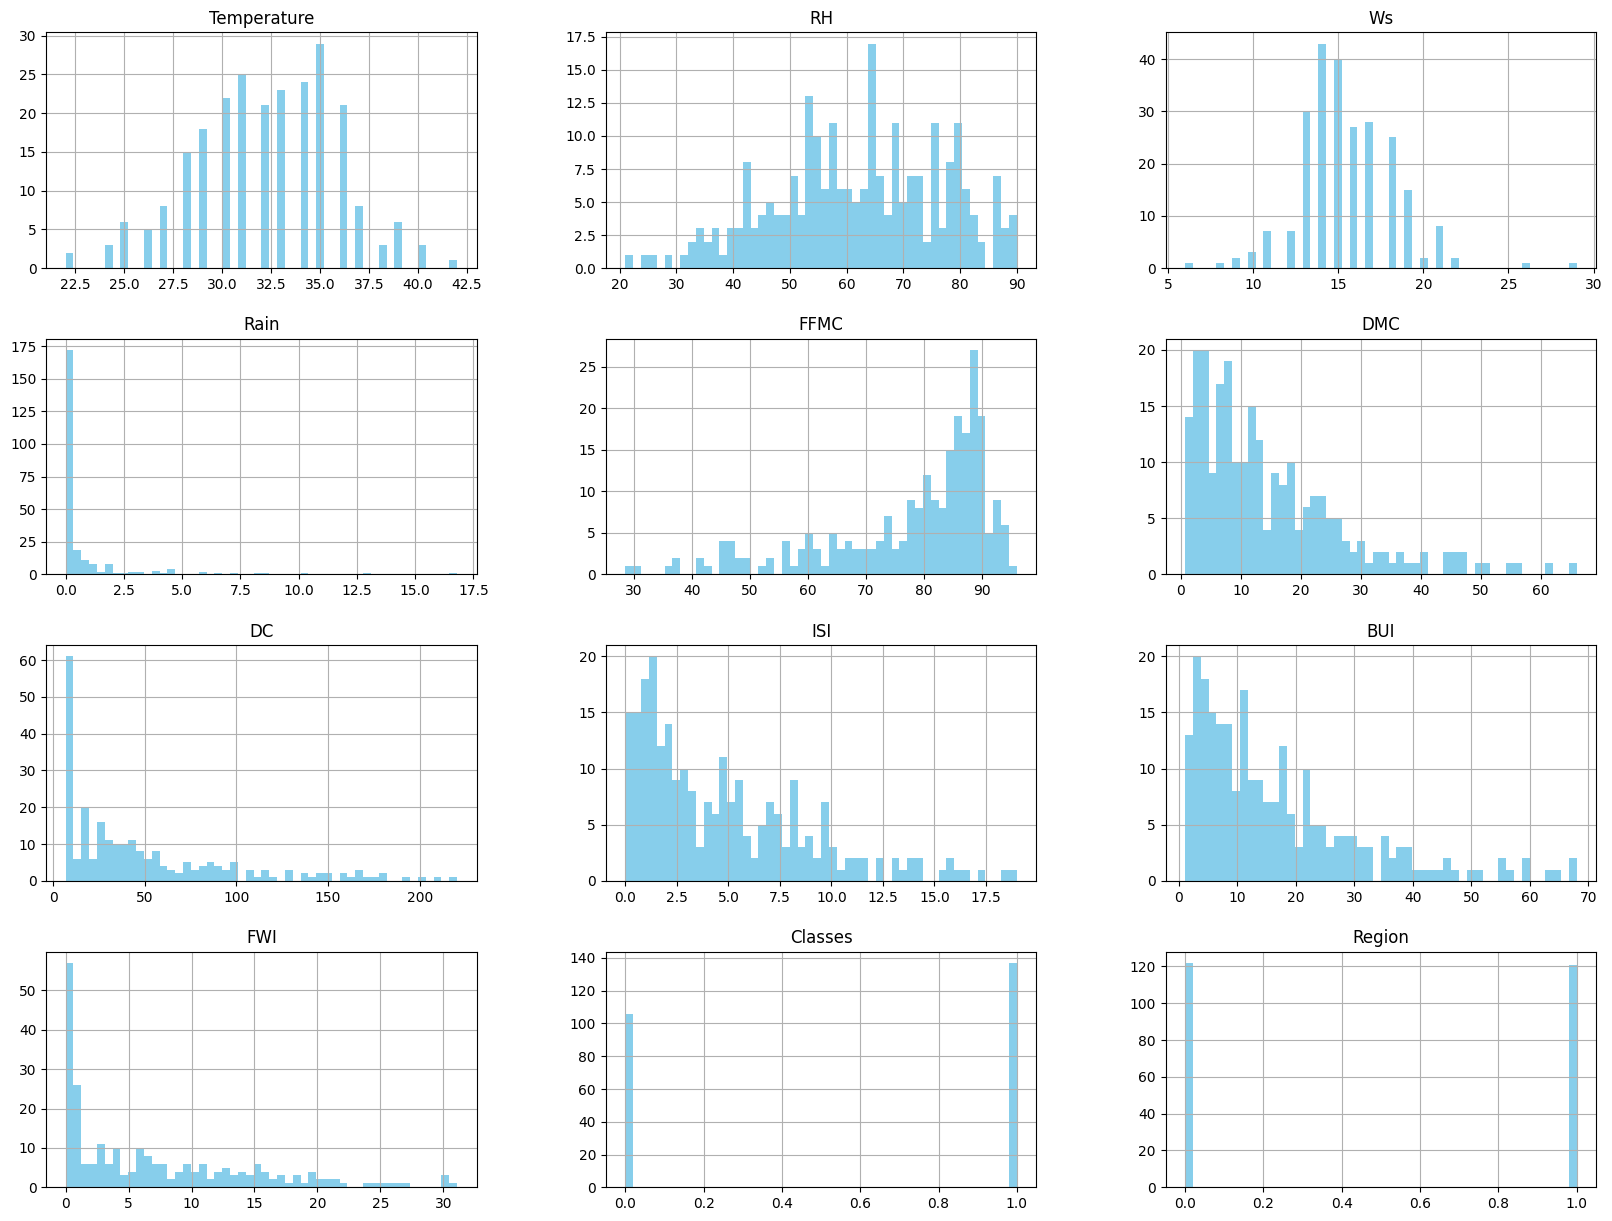

In [31]:
# Plot density distribution of the features
df2.hist(bins=50, 
         color='skyblue',
         figsize=(20, 15));

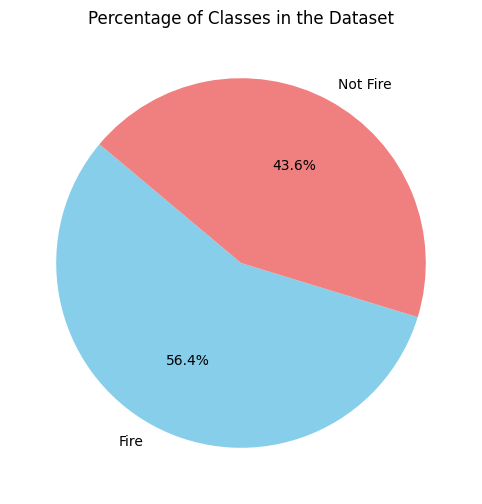

In [32]:
# Percentage of classes in the dataset for pie chart
class_percent = df2['Classes'].value_counts(normalize=True) * 100

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_percent, 
        labels=['Fire', 'Not Fire'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['skyblue', 'lightcoral'])
plt.title('Percentage of Classes in the Dataset');

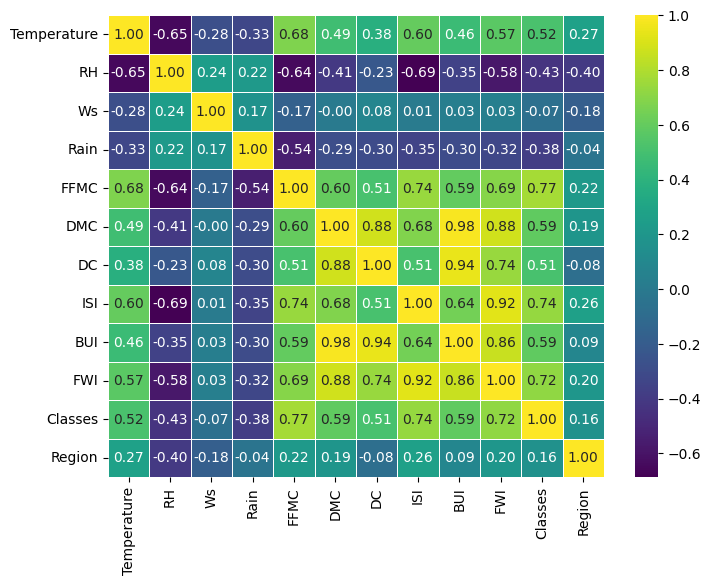

In [33]:
# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df2.corr(), 
            annot=True, 
            cmap='viridis',
            fmt='.2f',
            linewidths=0.5);

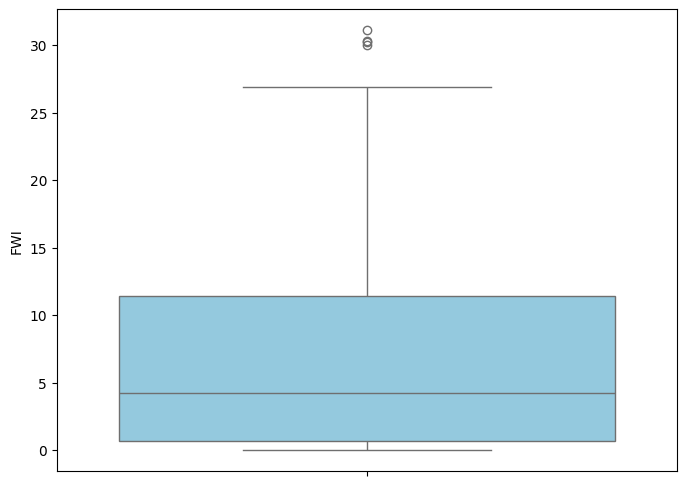

In [34]:
# Boxplot of the 'FWI' feature
plt.figure(figsize=(8, 6))
sns.boxplot(df2['FWI'], color='skyblue');

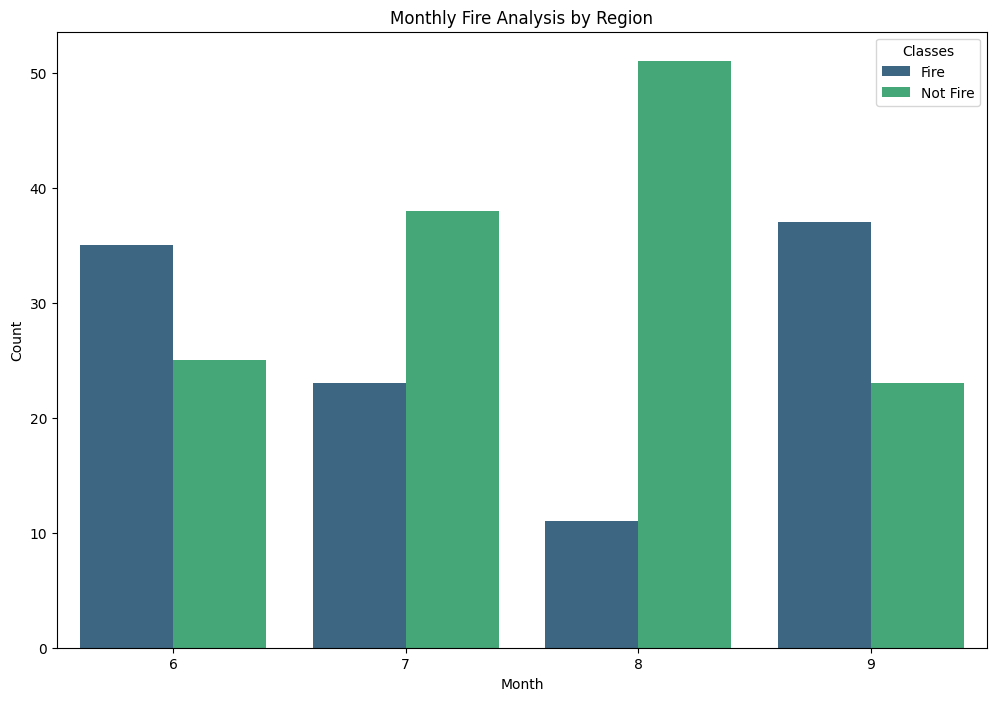

In [35]:
# Monthly fire anaysis by region
df_temp = df.loc[df['Region'] == 1]
plt.subplots(figsize=(12, 8))
sns.countplot(x='month', data=df, hue='Classes', palette='viridis')
plt.title('Monthly Fire Analysis by Region')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Classes', labels=['Fire', 'Not Fire']);

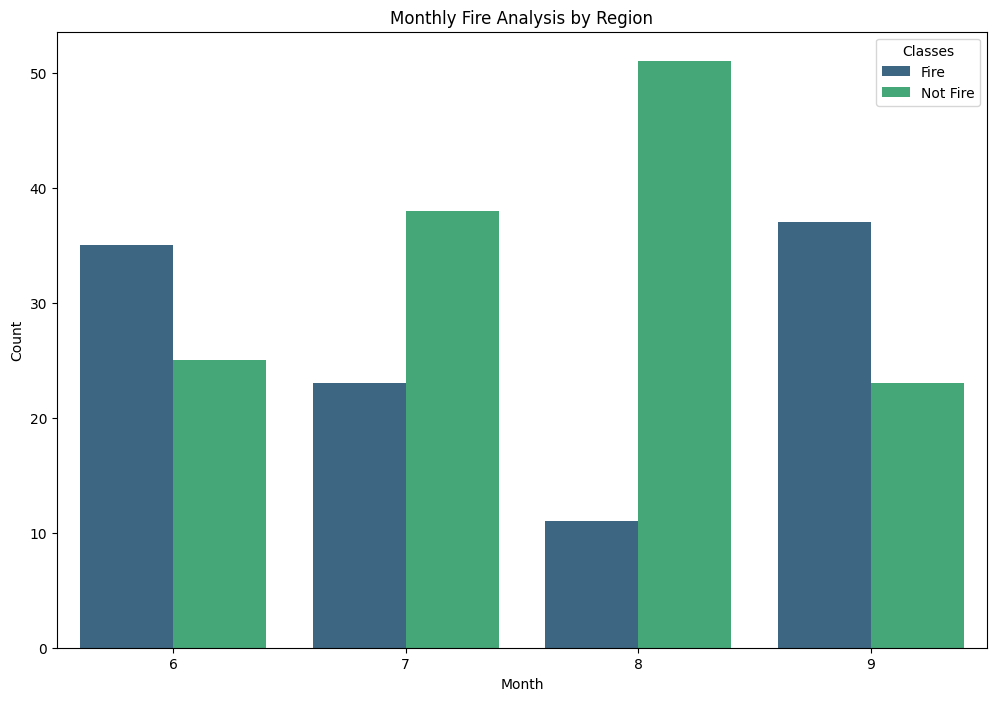

In [36]:
# Monthly fire anaysis by region
df_temp = df.loc[df['Region'] == 0]
plt.subplots(figsize=(12, 8))
sns.countplot(x='month', data=df, hue='Classes', palette='viridis')
plt.title('Monthly Fire Analysis by Region')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Classes', labels=['Fire', 'Not Fire']);

## Model Training

In [37]:
df2.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [38]:
# Create independent and dependent variables
X = df2.drop(columns='FWI')
y = df2['FWI']

In [41]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [39]:
X.head(),

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [40]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [42]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((182, 11), (61, 11), (182,), (61,))

In [44]:
# Feature selection based on correlation of features with the target variable
correlation = df2.corr()
correlation['FWI'].sort_values(ascending=False)

FWI            1.000000
ISI            0.922895
DMC            0.875864
BUI            0.857973
DC             0.739521
Classes        0.719216
FFMC           0.691132
Temperature    0.566670
Region         0.197102
Ws             0.032368
Rain          -0.324422
RH            -0.580957
Name: FWI, dtype: float64

In [45]:
# Feature selection of the training set based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


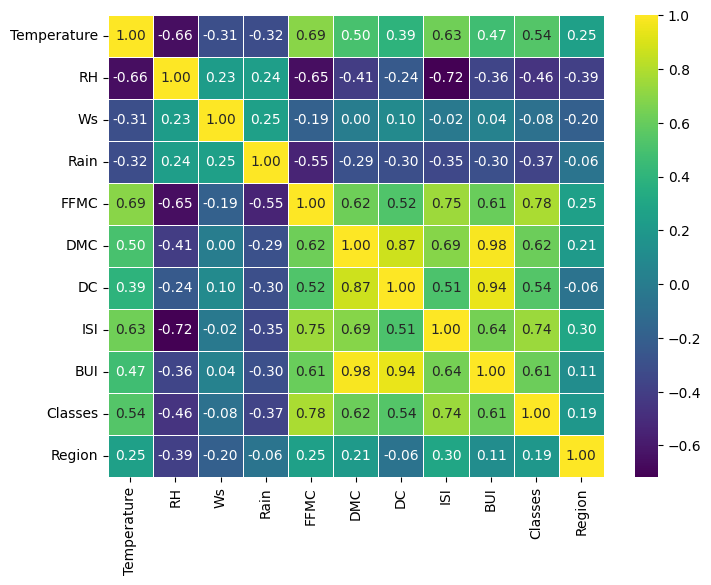

In [46]:
# Plot heatmap of the training set
plt.figure(figsize=(8, 6))
sns.heatmap(X_train.corr(), 
            annot=True, 
            cmap='viridis',
            fmt='.2f',
            linewidths=0.5);

In [50]:
# Function to remove correlated features from the dataset based on a threshold value

def remove_correlated_features(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [51]:
correlated_columns = remove_correlated_features(X_train, 0.85)
correlated_columns

{'BUI', 'DC'}

In [52]:
# Drop correlated columns from the training and test sets
X_train = X_train.drop(columns=correlated_columns)
X_test = X_test.drop(columns=correlated_columns)

In [53]:
X_train.shape, X_test.shape

((182, 9), (61, 9))

## Feature Scaling

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression Model

Test Set Evaluation
-----------------------
Mean Absolute Error: 0.546823646525
Mean Squared Error: 0.6742766873791604
Root Mean Squared Error: 0.8211435242265267
R2 Score: 0.9847657384266951
Adjusted R2 Score: 0.9820773393255237


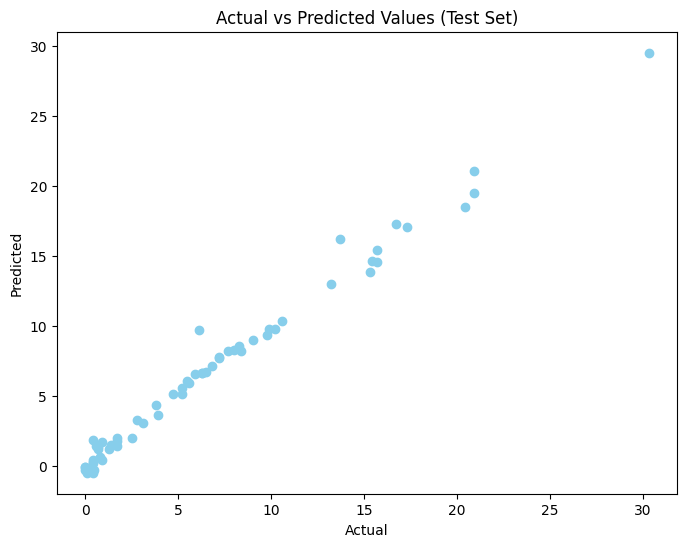

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = lin_reg.predict(X_test_scaled)

# Model evaluation
print('Test Set Evaluation')
print('-----------------------')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))
print('Adjusted R2 Score:', 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1) / (len(y_test) - X_test_scaled.shape[1] - 1))

# Scatter plot of the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='skyblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)');


## Lasso Regression Model

Test Set Evaluation
-----------------------
Mean Absolute Error: 1.133175994914409
Mean Squared Error: 2.2483458918974764
Root Mean Squared Error: 1.4994485292591662
R2 Score: 0.9492020263112388
Adjusted R2 Score: 0.9402376780132222


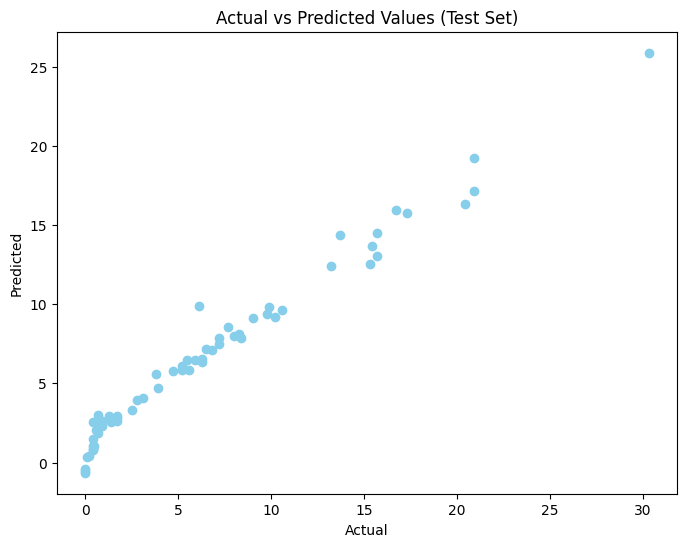

In [67]:
from sklearn.linear_model import Lasso

# Lasso Regression model
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

# Predictions
y_pred_lasso = lasso.predict(X_test_scaled)

# Model evaluation
print('Test Set Evaluation')
print('-----------------------')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_lasso))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_lasso))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print('R2 Score:', r2_score(y_test, y_pred_lasso))
print('Adjusted R2 Score:', 1 - (1-r2_score(y_test, y_pred_lasso)) * (len(y_test)-1) / (len(y_test) - X_test_scaled.shape[1] - 1))

# Scatter plot of the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, color='skyblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)');

## LassoCV Regression Model

Test Set Evaluation
-----------------------
Mean Absolute Error: 0.6199701158263435
Mean Squared Error: 0.7924995554743631
Root Mean Squared Error: 0.8902244410677361
R2 Score: 0.9820946715928275
Adjusted R2 Score: 0.9789349077562677


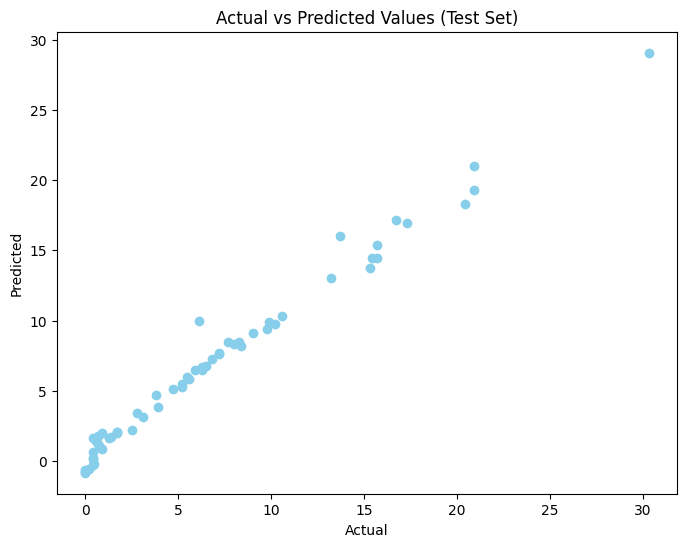

In [69]:
from sklearn.linear_model import LassoCV

# Lasso Regression model with cross-validation
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train_scaled, y_train)

# Predictions
y_pred_lasso_cv = lasso_cv.predict(X_test_scaled)

# Model evaluation
print('Test Set Evaluation')
print('-----------------------')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_lasso_cv))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_lasso_cv))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_lasso_cv)))
print('R2 Score:', r2_score(y_test, y_pred_lasso_cv))
print('Adjusted R2 Score:', 1 - (1-r2_score(y_test, y_pred_lasso_cv)) * (len(y_test)-1) / (len(y_test) - X_test_scaled.shape[1] - 1))

# Scatter plot of the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso_cv, color='skyblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)');

## Ridge Regression Model

Test Set Evaluation
-----------------------
Mean Absolute Error: 0.5642305340105713
Mean Squared Error: 0.6949198918152099
Root Mean Squared Error: 0.8336185529456562
R2 Score: 0.9842993364555512
Adjusted R2 Score: 0.9815286311241779


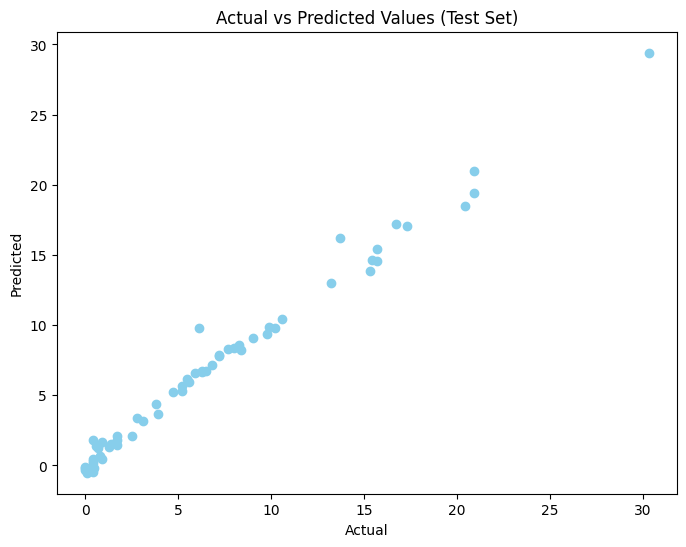

In [70]:
from sklearn.linear_model import Ridge

# Ridge Regression model
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

# Predictions
y_pred_ridge = ridge.predict(X_test_scaled)

# Model evaluation
print('Test Set Evaluation')
print('-----------------------')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_ridge))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_ridge))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print('R2 Score:', r2_score(y_test, y_pred_ridge))
print('Adjusted R2 Score:', 1 - (1-r2_score(y_test, y_pred_ridge)) * (len(y_test)-1) / (len(y_test) - X_test_scaled.shape[1] - 1))

# Scatter plot of the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, color='skyblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)');

## RidgeCV Regression Model

Test Set Evaluation
-----------------------
Mean Absolute Error: 0.5642305340105713
Mean Squared Error: 0.6949198918152099
Root Mean Squared Error: 0.8336185529456562
R2 Score: 0.9842993364555512
Adjusted R2 Score: 0.9815286311241779


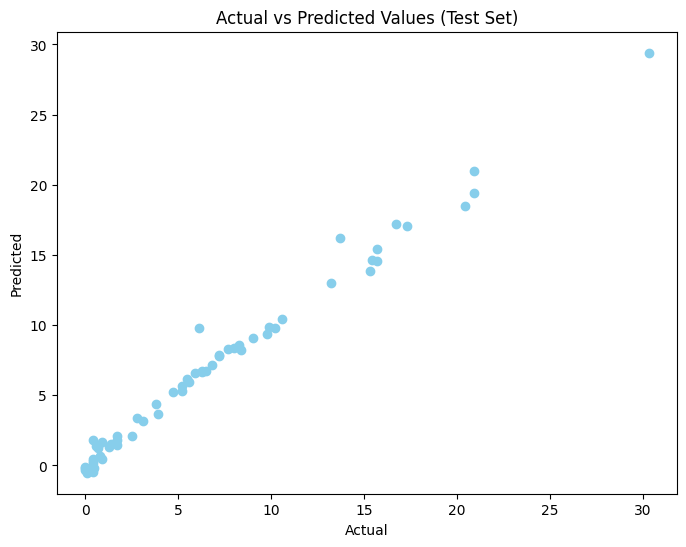

In [71]:
from sklearn.linear_model import RidgeCV

# Ridge Regression model with cross-validation
ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(X_train_scaled, y_train)

# Predictions
y_pred_ridge_cv = ridge_cv.predict(X_test_scaled)

# Model evaluation
print('Test Set Evaluation')
print('-----------------------')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_ridge_cv))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_ridge_cv))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_ridge_cv)))
print('R2 Score:', r2_score(y_test, y_pred_ridge_cv))
print('Adjusted R2 Score:', 1 - (1-r2_score(y_test, y_pred_ridge_cv)) * (len(y_test)-1) / (len(y_test) - X_test_scaled.shape[1] - 1))

# Scatter plot of the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge_cv, color='skyblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)');

## ElasticNet Regression Model

Test Set Evaluation
-----------------------
Mean Absolute Error: 1.8822353634896
Mean Squared Error: 5.517251101025224
Root Mean Squared Error: 2.3488829474933874
R2 Score: 0.8753460589519703
Adjusted R2 Score: 0.8533483046493768


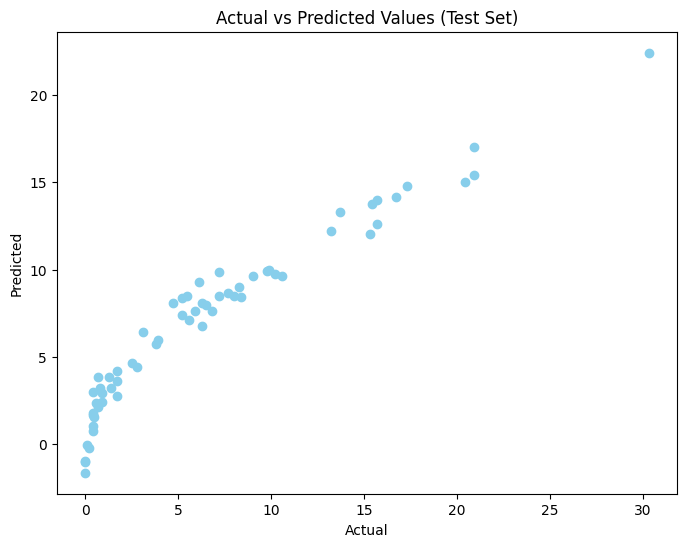

In [72]:
from sklearn.linear_model import ElasticNet

# ElasticNet Regression model
elastic_net = ElasticNet()
elastic_net.fit(X_train_scaled, y_train)

# Predictions
y_pred_elastic_net = elastic_net.predict(X_test_scaled)

# Model evaluation
print('Test Set Evaluation')
print('-----------------------')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_elastic_net))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_elastic_net))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_elastic_net)))
print('R2 Score:', r2_score(y_test, y_pred_elastic_net))
print('Adjusted R2 Score:', 1 - (1-r2_score(y_test, y_pred_elastic_net)) * (len(y_test)-1) / (len(y_test) - X_test_scaled.shape[1] - 1))

# Scatter plot of the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_elastic_net, color='skyblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)');

## ElasticNetCV Regression Model

Test Set Evaluation
-----------------------
Mean Absolute Error: 0.6575946731430904
Mean Squared Error: 0.8222830416276267
Root Mean Squared Error: 0.9067982364493364
R2 Score: 0.9814217587854941
Adjusted R2 Score: 0.978143245629993


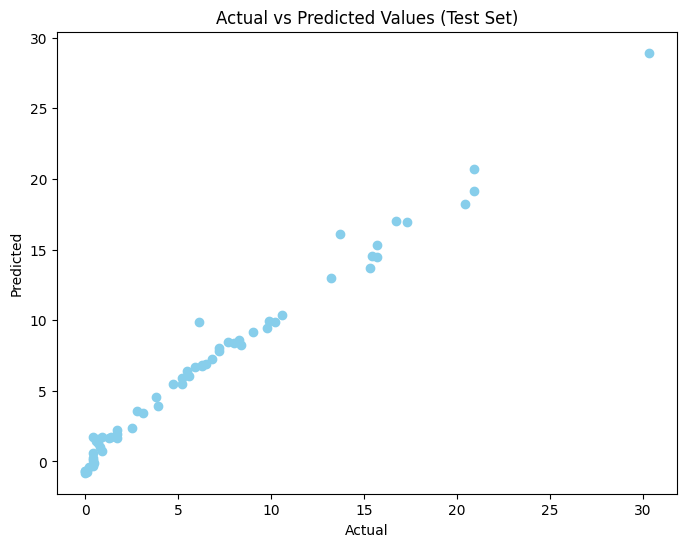

In [73]:
from sklearn.linear_model import ElasticNetCV

# ElasticNet Regression model with cross-validation
elastic_net_cv = ElasticNetCV(cv=5)
elastic_net_cv.fit(X_train_scaled, y_train)

# Predictions
y_pred_elastic_net_cv = elastic_net_cv.predict(X_test_scaled)

# Model evaluation
print('Test Set Evaluation')
print('-----------------------')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_elastic_net_cv))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_elastic_net_cv))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_elastic_net_cv)))
print('R2 Score:', r2_score(y_test, y_pred_elastic_net_cv))
print('Adjusted R2 Score:', 1 - (1-r2_score(y_test, y_pred_elastic_net_cv)) * (len(y_test)-1) / (len(y_test) - X_test_scaled.shape[1] - 1))

# Scatter plot of the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_elastic_net_cv, color='skyblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)');

## Pickle Machine Learning Model and Scaler

In [76]:
# Save the scaler object
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
    
# Save the Ridge model
with open('ridge_model.pkl', 'wb') as file:
    pickle.dump(ridge, file)